In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import PCA

def pool_hidden_states(hidden_states: np.ndarray, pool: str = "mean") -> np.ndarray:
    """
    Pool hidden states over the token dimension.

    Parameters:
        hidden_states (np.ndarray): Array of shape (L, T, H)
        pool (str): Pooling method — "mean", "first", or "last"

    Returns:
        np.ndarray: Pooled embeddings of shape (L, H)
    """
    if pool == "mean":
        pooled = hidden_states.mean(axis=1)
    elif pool == "median":
        pooled = np.median(hidden_states, axis=1)
    elif pool == "first":
        pooled = hidden_states[ :, 0, :]
    elif pool == "last":
        pooled = hidden_states[ :, -1, :]
    else:
        raise ValueError(f"Unsupported pool type: {pool}")

    return pooled  # shape: (L, H)


metadata = pd.read_csv("outputs/book_of_life_sample_3.csv")


In [2]:
print('\n'.join(metadata.iloc[0:3].text.values))

A 41-year-old single female from Zwolle, born in Zwolle, earning 41,305 euros per year, has no history of cardiovascular disease.
A 68-year-old divorced male from Zwolle, born in Groningen, earning 35,514 euros per year, has no history of cardiovascular disease.
A 54-year-old divorced male from Maastricht, born in Maastricht, earning 41,376 euros per year, has no history of cardiovascular disease.


In [3]:
metadata.to_csv("outputs/book_of_life_sample_3.csv", index=None)

In [4]:
with open("outputs/book_of_life_hidden_states_all_layers_sample_3.pt", "rb") as f:
    data = pickle.load(f)

summarized = {}

for i in data.keys():
     temp = np.nan_to_num(pool_hidden_states(data[i], pool="median"), nan=0.0, posinf=0.0, neginf=0.0)
     summarized[i] = temp[-1]

In [5]:
embedding_df = pd.DataFrame.from_dict(summarized, orient="index")
embedding_df.index.name = "person_id"
embedding_df.reset_index(inplace=True)  # person_id becomes a column
metadata["person_id"] = metadata["person_id"].astype(int)  # ensure type match
merged = pd.merge(embedding_df, metadata, on="person_id", how="inner")
merged

/scratch/gpfs/TROYANSKAYA/sokolova/predicting-zygosity/ttenv/lib/python3.9/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/scratch/gpfs/TROYANSKAYA/sokolova/predicting-zygosity/ttenv/lib/python3.9/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,person_id,0,1,2,3,4,5,6,7,8,...,5375,age,gender,income,city,birthplace,civil_status,nationality,cardio_history,text
0,0,-0.071289,0.037842,-0.843750,-0.023682,0.213867,-0.359375,0.769531,0.593750,-0.394531,...,-1.328125,41,female,41305,Zwolle,Zwolle,single,Dutch,0,"A 41-year-old single female from Zwolle, born ..."
1,1,-0.160400,0.104980,-1.308594,-0.001030,0.050629,-0.444336,0.804688,0.509766,-0.166260,...,-1.218750,68,male,35514,Zwolle,Groningen,divorced,Dutch,0,"A 68-year-old divorced male from Zwolle, born ..."
2,2,0.135742,0.073242,-0.882812,-0.024902,0.015320,-0.363281,0.566406,0.480469,-0.613281,...,-1.398438,54,male,41376,Maastricht,Maastricht,divorced,Dutch,0,"A 54-year-old divorced male from Maastricht, b..."
3,3,0.172852,0.468750,-1.054688,-0.025024,-0.054932,-0.574219,0.722656,0.406250,-0.531250,...,-1.062500,49,male,15000,Rotterdam,Groningen,divorced,Dutch,0,"A 49-year-old divorced male from Rotterdam, bo..."
4,4,0.185547,0.458984,-0.664062,-0.014893,0.314453,-0.570312,0.605469,0.539062,-0.835938,...,-0.859375,32,female,36704,Eindhoven,Rotterdam,married,Dutch,0,"A 32-year-old married female from Eindhoven, b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.055786,0.440430,-0.712891,-0.017822,0.156006,-0.599609,0.642578,0.234863,-0.671875,...,-1.042969,45,male,27762,Groningen,The Hague,widowed,Dutch,0,"A 45-year-old widowed male from Groningen, bor..."
96,96,-0.010376,0.147461,-0.703125,-0.015503,0.318359,-0.507812,0.480469,0.644531,-0.957031,...,-0.734375,46,female,38843,Eindhoven,Eindhoven,divorced,Dutch,0,"A 46-year-old divorced female from Eindhoven, ..."
97,97,0.018799,0.204102,-0.800781,-0.034424,0.208008,-0.554688,0.275391,0.239258,-0.324219,...,-0.687500,43,female,45117,Amsterdam,Groningen,single,Dutch,0,"A 43-year-old single female from Amsterdam, bo..."
98,98,-0.028931,0.104980,-0.978516,0.008545,-0.004669,-0.413086,0.209473,0.461914,-0.008545,...,-0.929688,23,female,44150,Amsterdam,Nijmegen,widowed,Dutch,1,"A 23-year-old widowed female from Amsterdam, b..."


/tmp/ipykernel_877751/863182644.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_counts, x="gender", y="count", ax=axes[0], palette="Set2")
/tmp/ipykernel_877751/863182644.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts, x="city", y="count", ax=axes[2], palette="Set3")


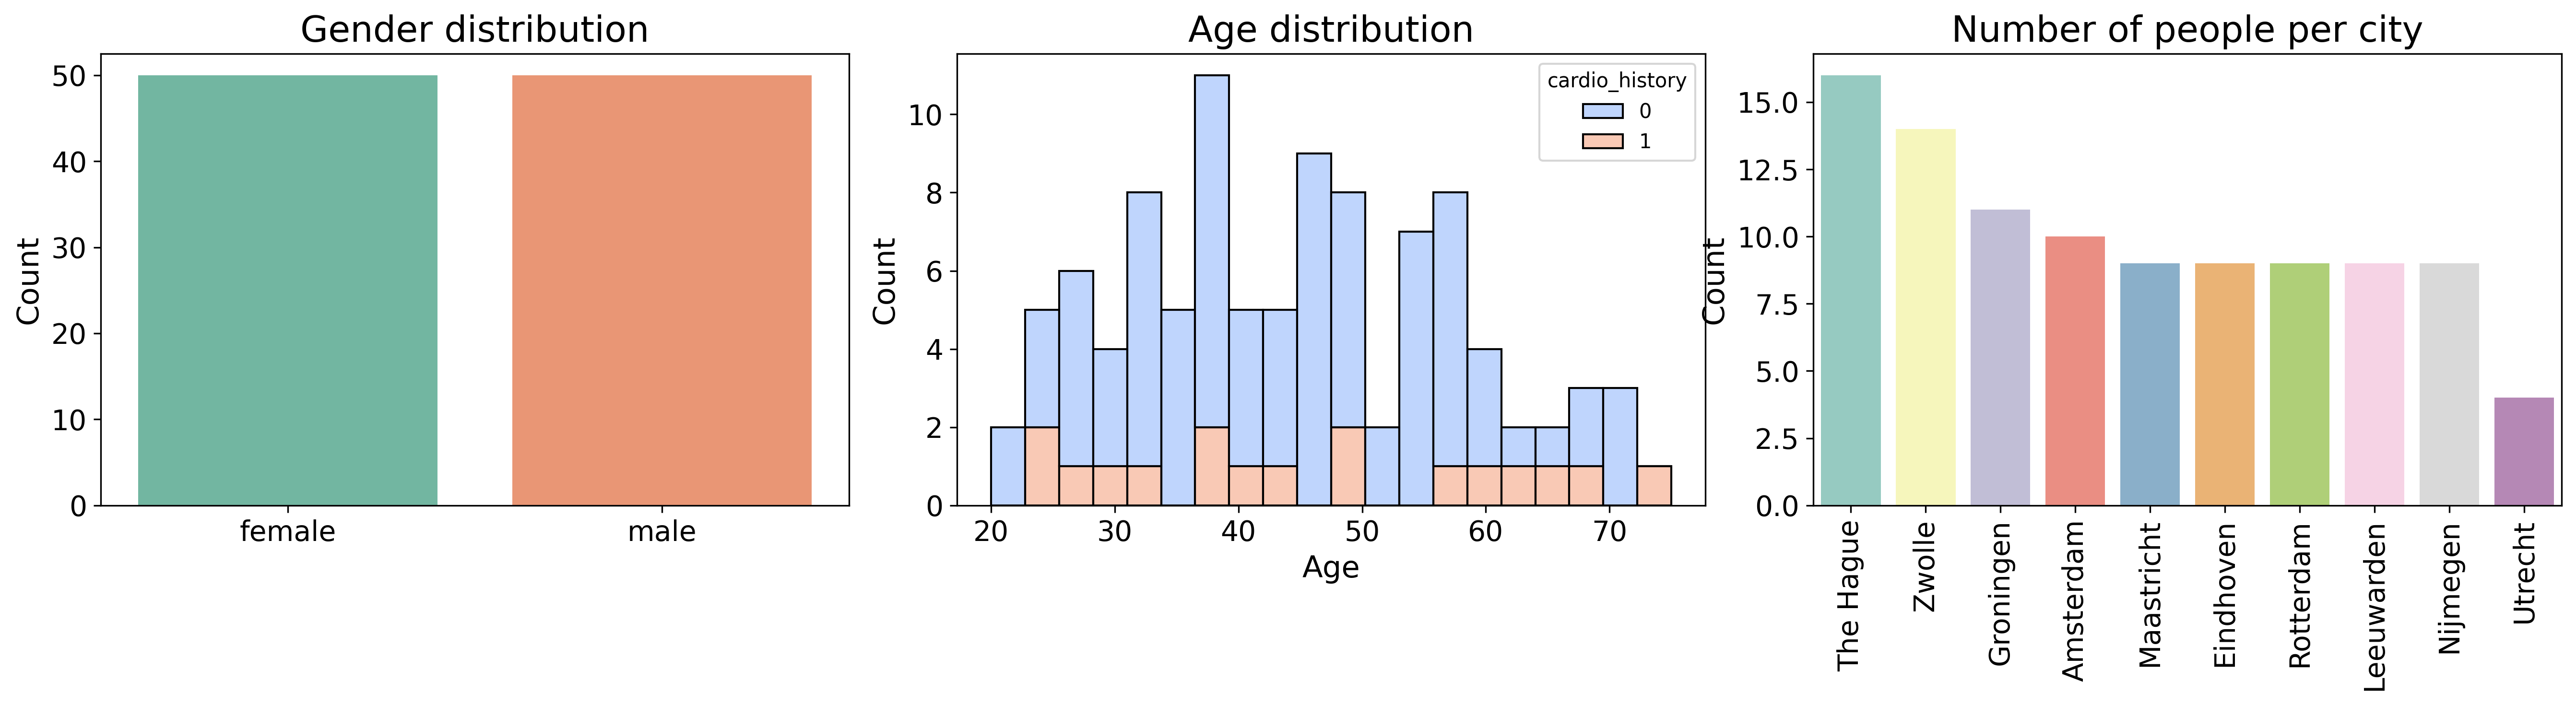

In [6]:
# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=300)

# Bar plot: gender counts
gender_counts = merged["gender"].value_counts().reset_index()
gender_counts.columns = ["gender", "count"]
sns.barplot(data=gender_counts, x="gender", y="count", ax=axes[0], palette="Set2")
axes[0].set_title("Gender distribution", fontsize=18)
axes[0].set_xlabel("")
axes[0].set_ylabel("Count", fontsize=15)

# Age distribution split by cardio_history
sns.histplot(data=merged, x="age", hue="cardio_history", multiple="stack", bins=20, 
             ax=axes[1], palette="coolwarm")
axes[1].set_title("Age distribution", fontsize=18)
axes[1].set_xlabel("Age", fontsize=15)
axes[1].set_ylabel("Count", fontsize=15)

# Bar plot: city counts
city_counts = merged["city"].value_counts().reset_index()
city_counts.columns = ["city", "count"]

# Plot all cities (sorted by count)
sns.barplot(data=city_counts, x="city", y="count", ax=axes[2], palette="Set3")
axes[2].set_title("Number of people per city", fontsize=18)
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_xlabel("", fontsize=15)
axes[2].set_ylabel("Count", fontsize=15)
# increase ticks fontsize
for ax in axes:
    ax.tick_params(axis='both', labelsize=14)

# Final layout
plt.tight_layout()
plt.show()


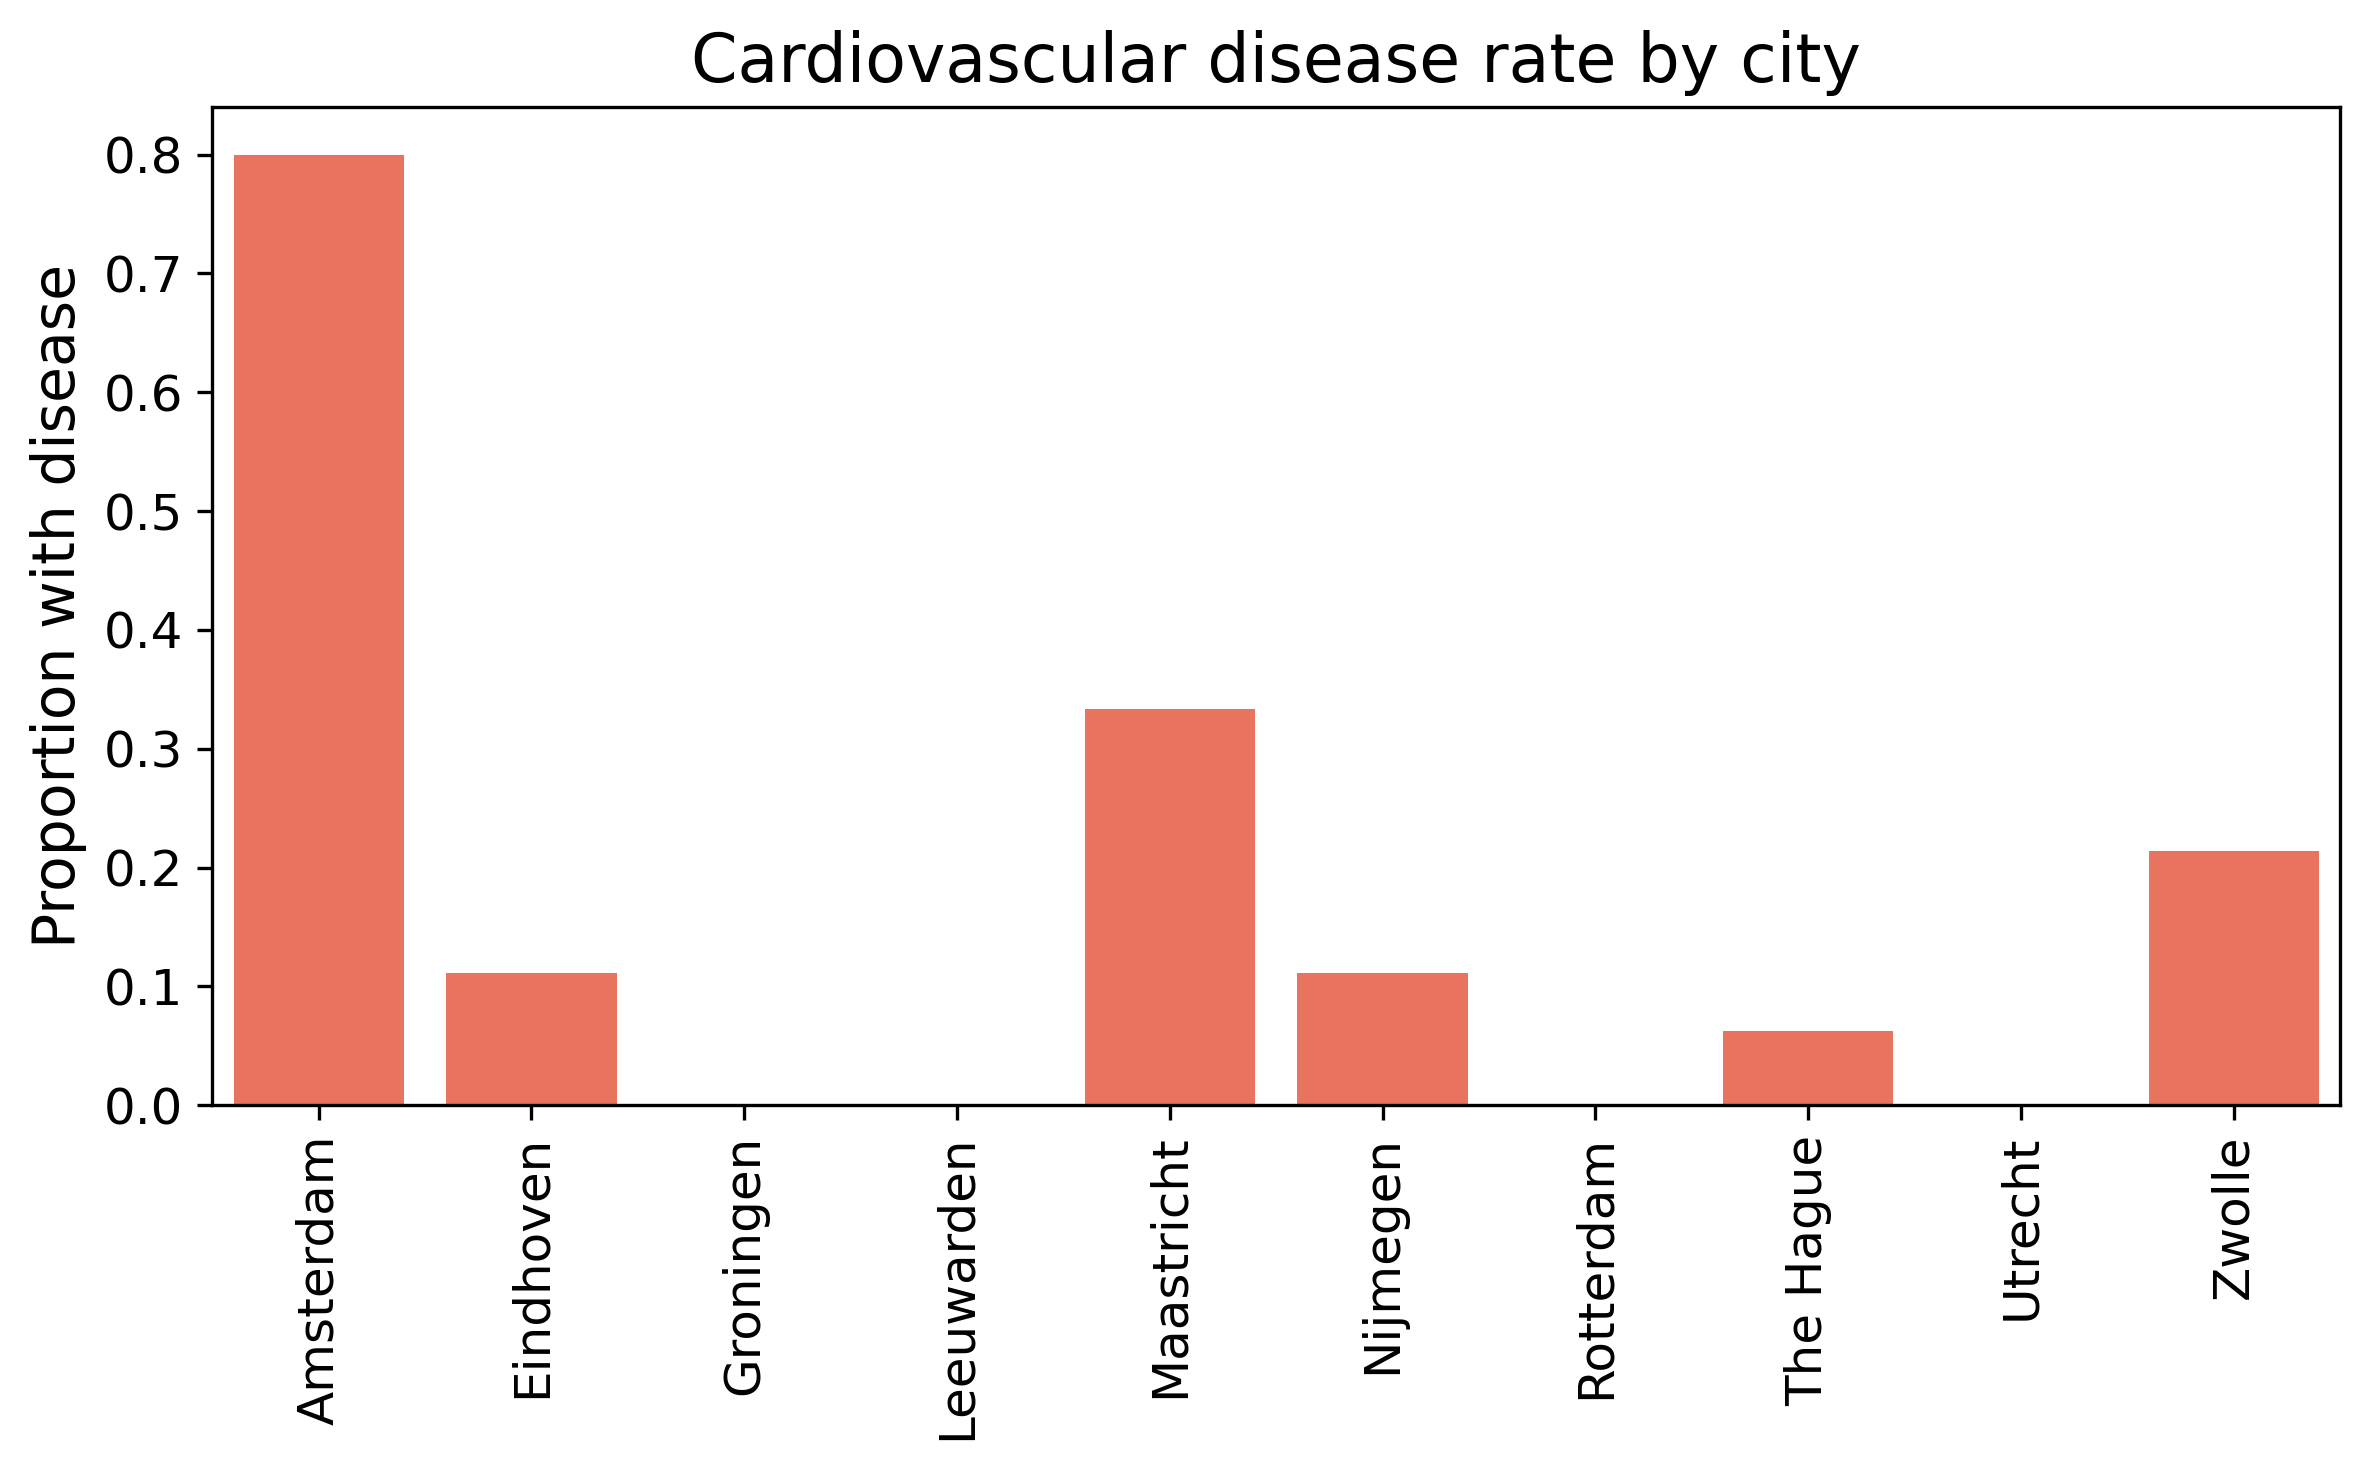

: 

: 

In [ ]:
# Count total and cardio cases per city
total_by_city = merged.groupby("city").size()
cardio_by_city = merged[merged["cardio_history"] == 1].groupby("city").size()
cardio_rate = (cardio_by_city / total_by_city).fillna(0).reset_index()
cardio_rate.columns = ["city", "cardio_rate"]

# Plot
plt.figure(figsize=(8, 5), dpi=300)
sns.barplot(data=cardio_rate, x="city", y="cardio_rate", color='tomato')
plt.title("Cardiovascular disease rate by city", fontsize=16)
plt.xlabel("", fontsize=14)
plt.ylabel("Proportion with disease", fontsize=14)
plt.xticks(rotation=90, ha="center", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [7]:
X = merged.iloc[:, 1:embedding_df.shape[1]]  # only embedding columns
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
merged["pca1"] = X_pca[:, 0]
merged["pca2"] = X_pca[:, 1]

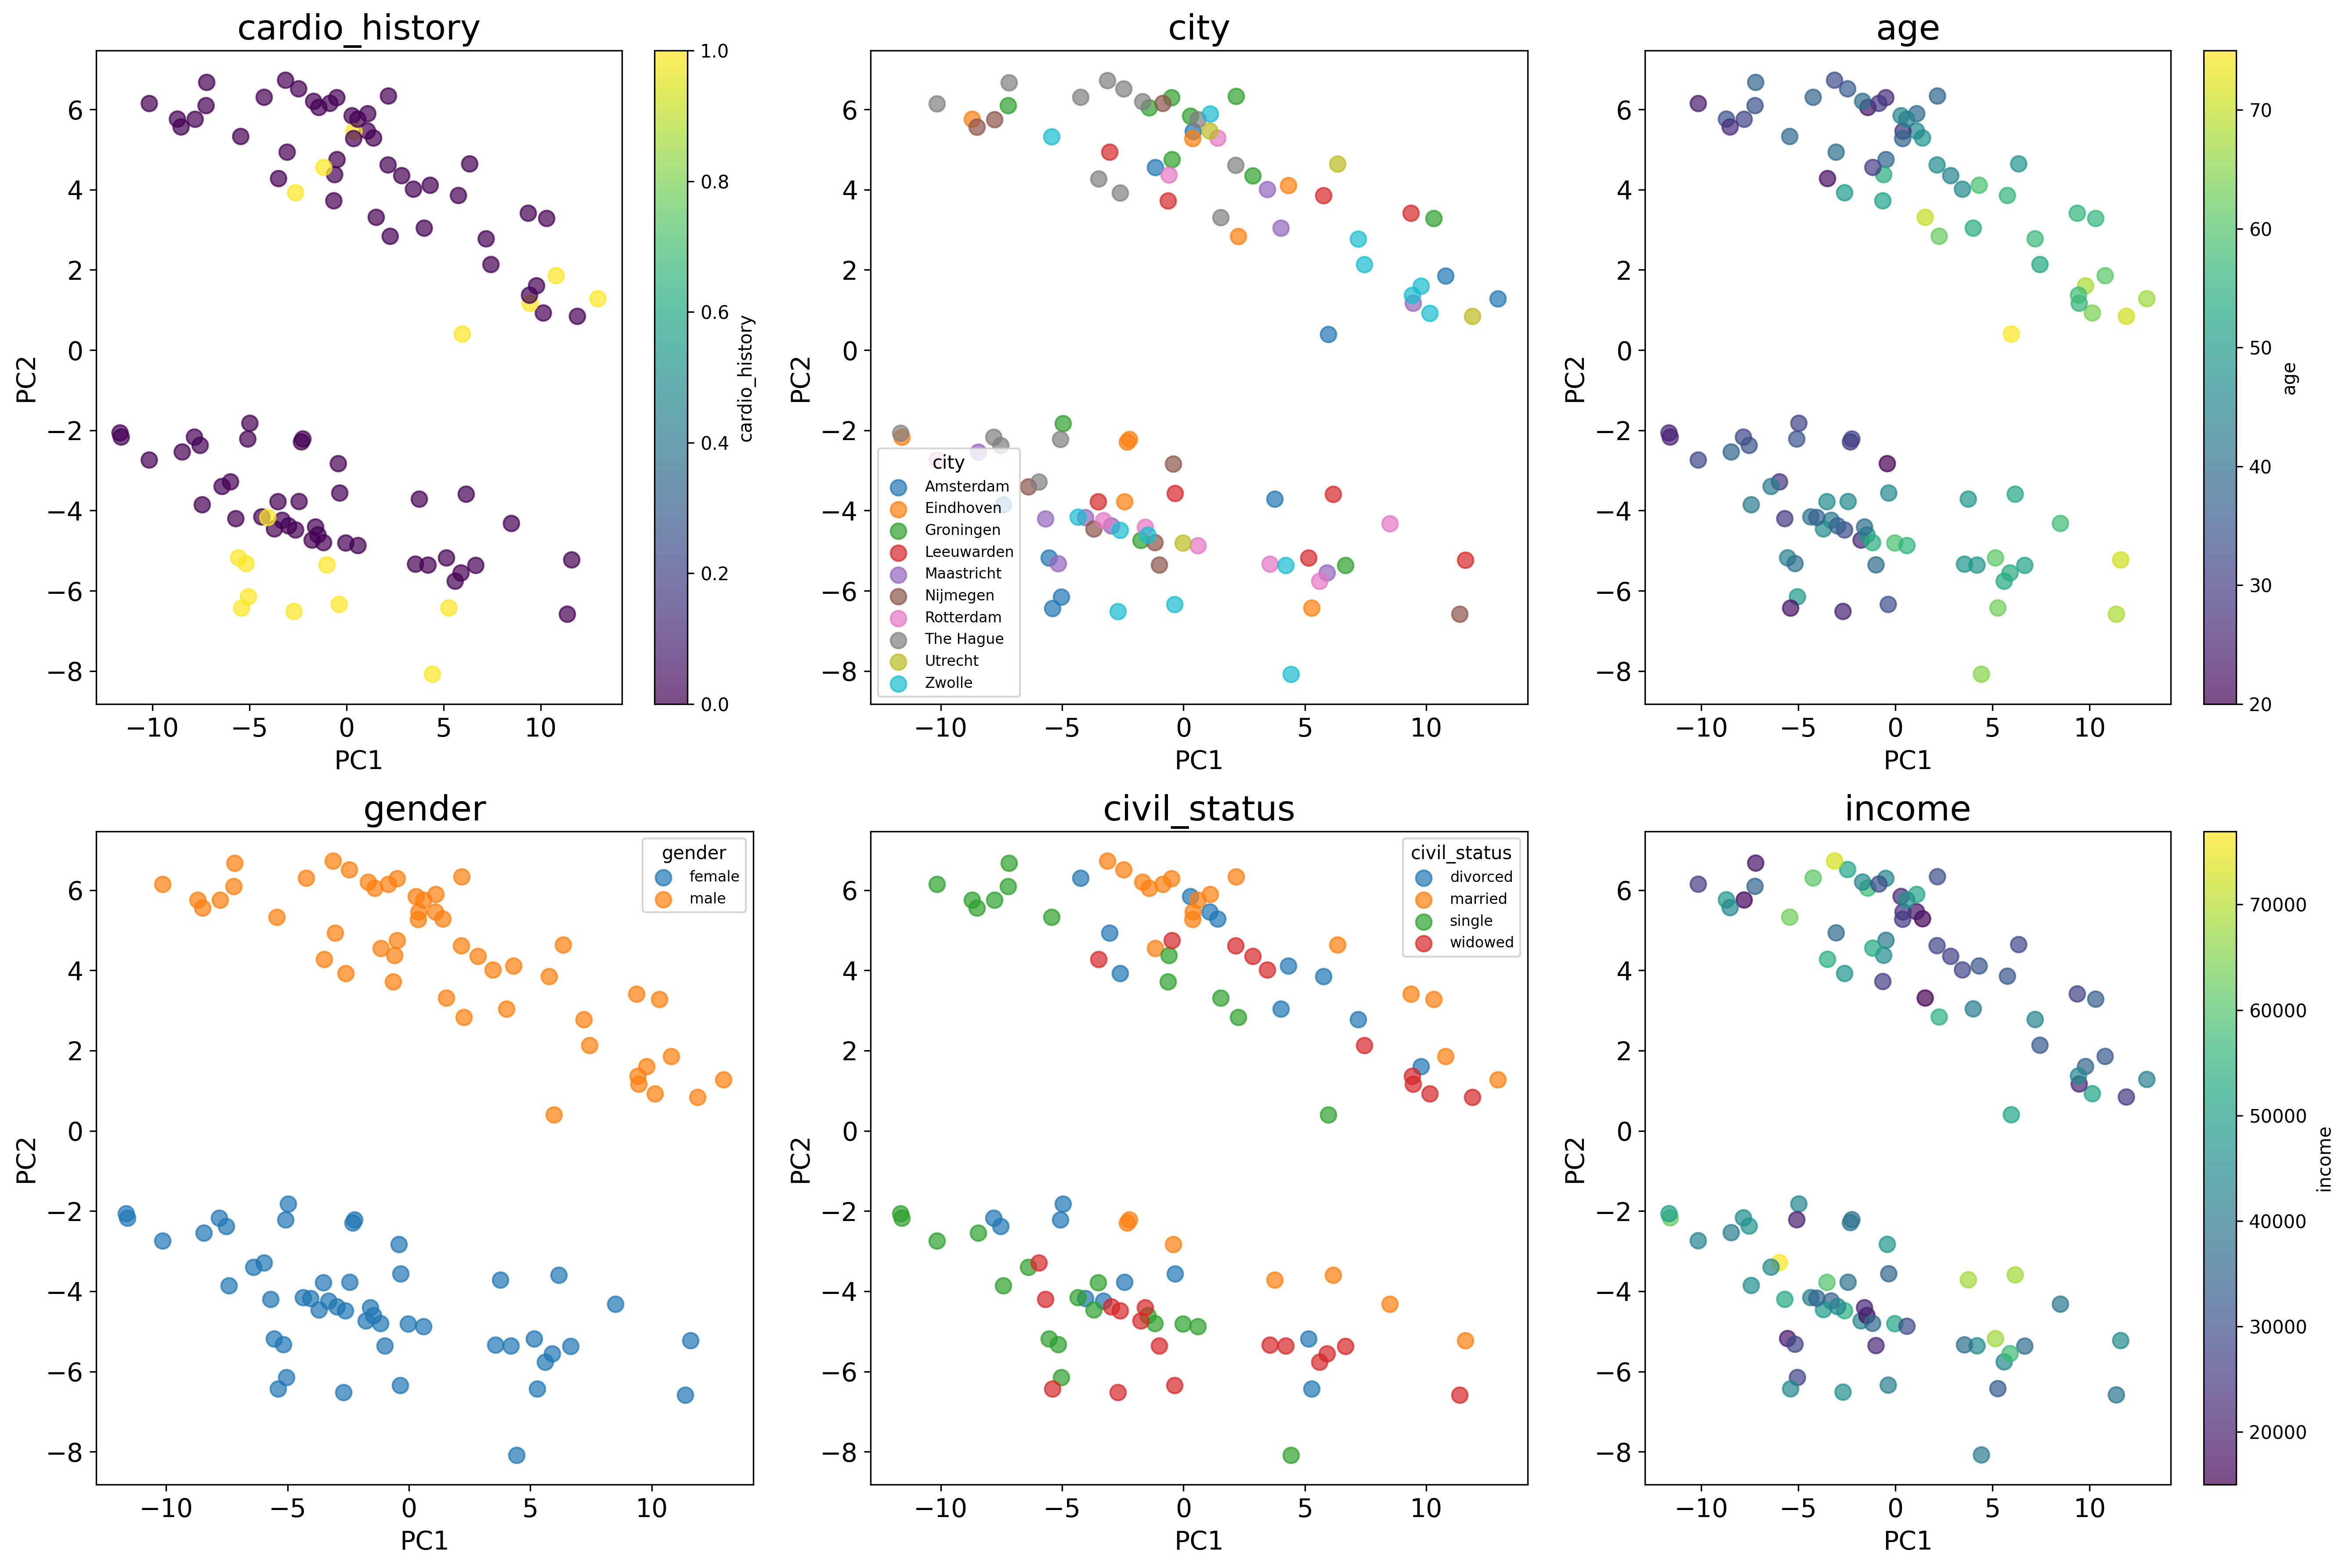

In [8]:
def plot_pca_by_column(df, color_by):
    plt.figure(figsize=(8, 6))
    values = df[color_by]

    if pd.api.types.is_numeric_dtype(values):
        scatter = plt.scatter(df["pca1"], df["pca2"], c=values, cmap="viridis", alpha=0.7)
        plt.colorbar(scatter, label=color_by)
    else:
        categories = values.astype("category")
        palette = plt.get_cmap("tab10")

        for i, category in enumerate(categories.cat.categories):
            subset = df[categories == category]
            plt.scatter(subset["pca1"], subset["pca2"],
                        label=str(category),
                        alpha=0.7,
                        color=palette(i % 10))  # wrap around if >10

        plt.legend(title=color_by, bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"PCA colored by {color_by}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# plot_pca_by_column(merged, color_by="cardio_history")

def plot_pca_grid(df, columns, ncols=3, figsize=(18, 12)):
    nrows = -(-len(columns) // ncols)  # ceil division
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, dpi=300)
    axes = axes.flatten()

    for idx, color_by in enumerate(columns):
        ax = axes[idx]
        values = df[color_by]

        if pd.api.types.is_numeric_dtype(values):
            scatter = ax.scatter(df["pca1"], df["pca2"], c=values, cmap="viridis", 
                                 alpha=0.7, s=73)
            fig.colorbar(scatter, ax=ax, label=color_by)
        else:
            categories = values.astype("category")
            palette = plt.get_cmap("tab10")
            for i, category in enumerate(categories.cat.categories):
                subset = df[categories == category]
                ax.scatter(subset["pca1"], subset["pca2"],
                           label=str(category),
                           alpha=0.7,
                           color=palette(i % 10), 
                           s=73)
            ax.legend(title=color_by, fontsize=8, loc="best")

        ax.set_title(color_by, fontsize=19)
        ax.set_xlabel("PC1", fontsize=14)
        ax.set_ylabel("PC2", fontsize=14)
        ax.tick_params(labelsize=14)

    # Remove any unused axes
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_pca_grid(
    merged,
    columns=["cardio_history", "city", "age", "gender", "civil_status", "income"],
    ncols=3
)

# Predictive evaluation

In [20]:
# silly check - predicting cardio_history from PCA components
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score


# baseline
baseline = (merged["city"] == "Amsterdam").astype(int)
true_labels = merged["cardio_history"].astype(int)
accuracy = accuracy_score(true_labels, baseline)
print(f"Baseline accuracy (predict cardio_history = 1 if Amsterdam): {accuracy:.2f}")
f1 = f1_score(merged["cardio_history"], baseline)
print(f"Baseline F1 score (predict cardio_history = 1 if Amsterdam): {f1:.2f}")


X = merged[["pca1", "pca2"]]
y = merged["cardio_history"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(f"Model accuracy on PCA components: {model.score(X_test, y_test):.4f}")
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"f1 score: {f1:.2f}")

# predicting from embeddings
X = merged.iloc[:, 1:embedding_df.shape[1]]
y = merged["cardio_history"]
print('X shape:', X.shape)

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(f"Model accuracy on full embeddings: {model.score(X_test, y_test):.4f}")
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"f1 score: {f1:.2f}")


Baseline accuracy (predict cardio_history = 1 if Amsterdam): 0.89
Baseline F1 score (predict cardio_history = 1 if Amsterdam): 0.59
Model accuracy on PCA components: 0.8500
f1 score: 0.00
X shape: (100, 5376)
Model accuracy on full embeddings: 1.0000
f1 score: 1.00


# Create a new biased column [need to be verified]

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

def assign_biased_short_hair(df, column, value, high_p=0.7, low_p=0.1, is_numerical=False):
    np.random.seed(42)  # Set seed for reproducibility
    def assign(row):
        if not is_numerical:
            return int(np.random.rand() < (high_p if row[column] == value else low_p))
        else:
            return int(np.random.rand() < (high_p if row[column] <= value else low_p))
    return df.apply(assign, axis=1)

def evaluate_baseline(df, column, value, target_col="short_hair", is_numerical=False):
    if not is_numerical:
        baseline = (df[column] == value).astype(int)
    else:
        baseline = (df[column] <= value).astype(int)
    y_true = df[target_col]
    acc = accuracy_score(y_true, baseline)
    f1 = f1_score(y_true, baseline)
    return acc, f1

def evaluate_model(X, y, test_size=0.2, seed=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, f1

def run_evaluation(merged, embedding_df, bias_column, bias_value, is_numerical=False):
    # assign biased labels
    merged["short_hair"] = assign_biased_short_hair(merged, column=bias_column, value=bias_value, 
                                                    is_numerical=is_numerical)
    print('Total new short hair cases:', merged["short_hair"].sum())
    
    # baseline evaluation
    base_acc, base_f1 = evaluate_baseline(merged, column=bias_column, value=bias_value, 
                                          is_numerical=is_numerical)
    print(f"[Baseline: {bias_column} == {bias_value}] Accuracy: {base_acc:.2f} | F1: {base_f1:.2f}")

    # PCA model evaluation
    X_pca = merged[["pca1", "pca2"]]
    y = merged["short_hair"]
    pca_acc, pca_f1 = evaluate_model(X_pca, y)
    print(f"PCA-based model: Accuracy: {pca_acc:.2f} | F1: {pca_f1:.2f}")

    # embedding model evaluation
    X_embed = merged.iloc[:, 1:embedding_df.shape[1]]
    embed_acc, embed_f1 = evaluate_model(X_embed, y)
    print(f"Embedding-based model: Accuracy: {embed_acc:.2f} | F1: {embed_f1:.2f}")

    # return results as dict
    return {
        "bias_column": bias_column,
        "bias_value": bias_value,
        "baseline_accuracy": base_acc,
        "baseline_f1": base_f1,
        "pca_accuracy": pca_acc,
        "pca_f1": pca_f1,
        "embedding_accuracy": embed_acc,
        "embedding_f1": embed_f1
    }


_ = run_evaluation(merged, embedding_df, bias_column="city", bias_value="The Hague")


Total new short hair cases: 24
[Baseline: city == The Hague] Accuracy: 0.90 | F1: 0.75
PCA-based model: Accuracy: 0.80 | F1: 0.33
Embedding-based model: Accuracy: 0.95 | F1: 0.89


In [15]:
# define list of (column, value) pairs to inject bias into
bias_conditions = [
    ("gender", "male", False), # (column, value, is_numerical)
    ("city", "The Hague", False),
    ("civil_status", "single", False), 
    ("age", 10, True),  # age is numerical
    ("income", 50000, True)  
]

# collect results
results = []
for i in bias_conditions:
    col, val, is_numerical = i
    result = run_evaluation(merged, embedding_df, bias_column=col, bias_value=val, is_numerical=is_numerical)
    results.append(result)

# convert to DataFrame for analysis or plotting
results_df = pd.DataFrame(results)
results_df

Total new short hair cases: 39
[Baseline: gender == male] Accuracy: 0.75 | F1: 0.72
PCA-based model: Accuracy: 0.90 | F1: 0.88
Embedding-based model: Accuracy: 0.95 | F1: 0.92
Total new short hair cases: 24
[Baseline: city == The Hague] Accuracy: 0.90 | F1: 0.75
PCA-based model: Accuracy: 0.80 | F1: 0.33
Embedding-based model: Accuracy: 0.95 | F1: 0.89
Total new short hair cases: 30
[Baseline: civil_status == single] Accuracy: 0.83 | F1: 0.71
PCA-based model: Accuracy: 0.85 | F1: 0.73
Embedding-based model: Accuracy: 0.90 | F1: 0.83
Total new short hair cases: 13
[Baseline: age == 10] Accuracy: 0.87 | F1: 0.00
PCA-based model: Accuracy: 0.90 | F1: 0.50
Embedding-based model: Accuracy: 0.95 | F1: 0.80
Total new short hair cases: 60
[Baseline: income == 50000] Accuracy: 0.73 | F1: 0.81
PCA-based model: Accuracy: 0.85 | F1: 0.87
Embedding-based model: Accuracy: 0.80 | F1: 0.82


,bias_column,bias_value,baseline_accuracy,baseline_f1,pca_accuracy,pca_f1,embedding_accuracy,embedding_f1
0,gender,male,0.75,0.719101,0.90,0.875000,0.95,0.923077
1,city,The Hague,0.90,0.750000,0.80,0.333333,0.95,0.888889
2,civil_status,single,0.83,0.711864,0.85,0.727273,0.90,0.833333
3,age,10,0.87,0.000000,0.90,0.500000,0.95,0.800000
4,income,50000,0.73,0.805755,0.85,0.869565,0.80,0.818182


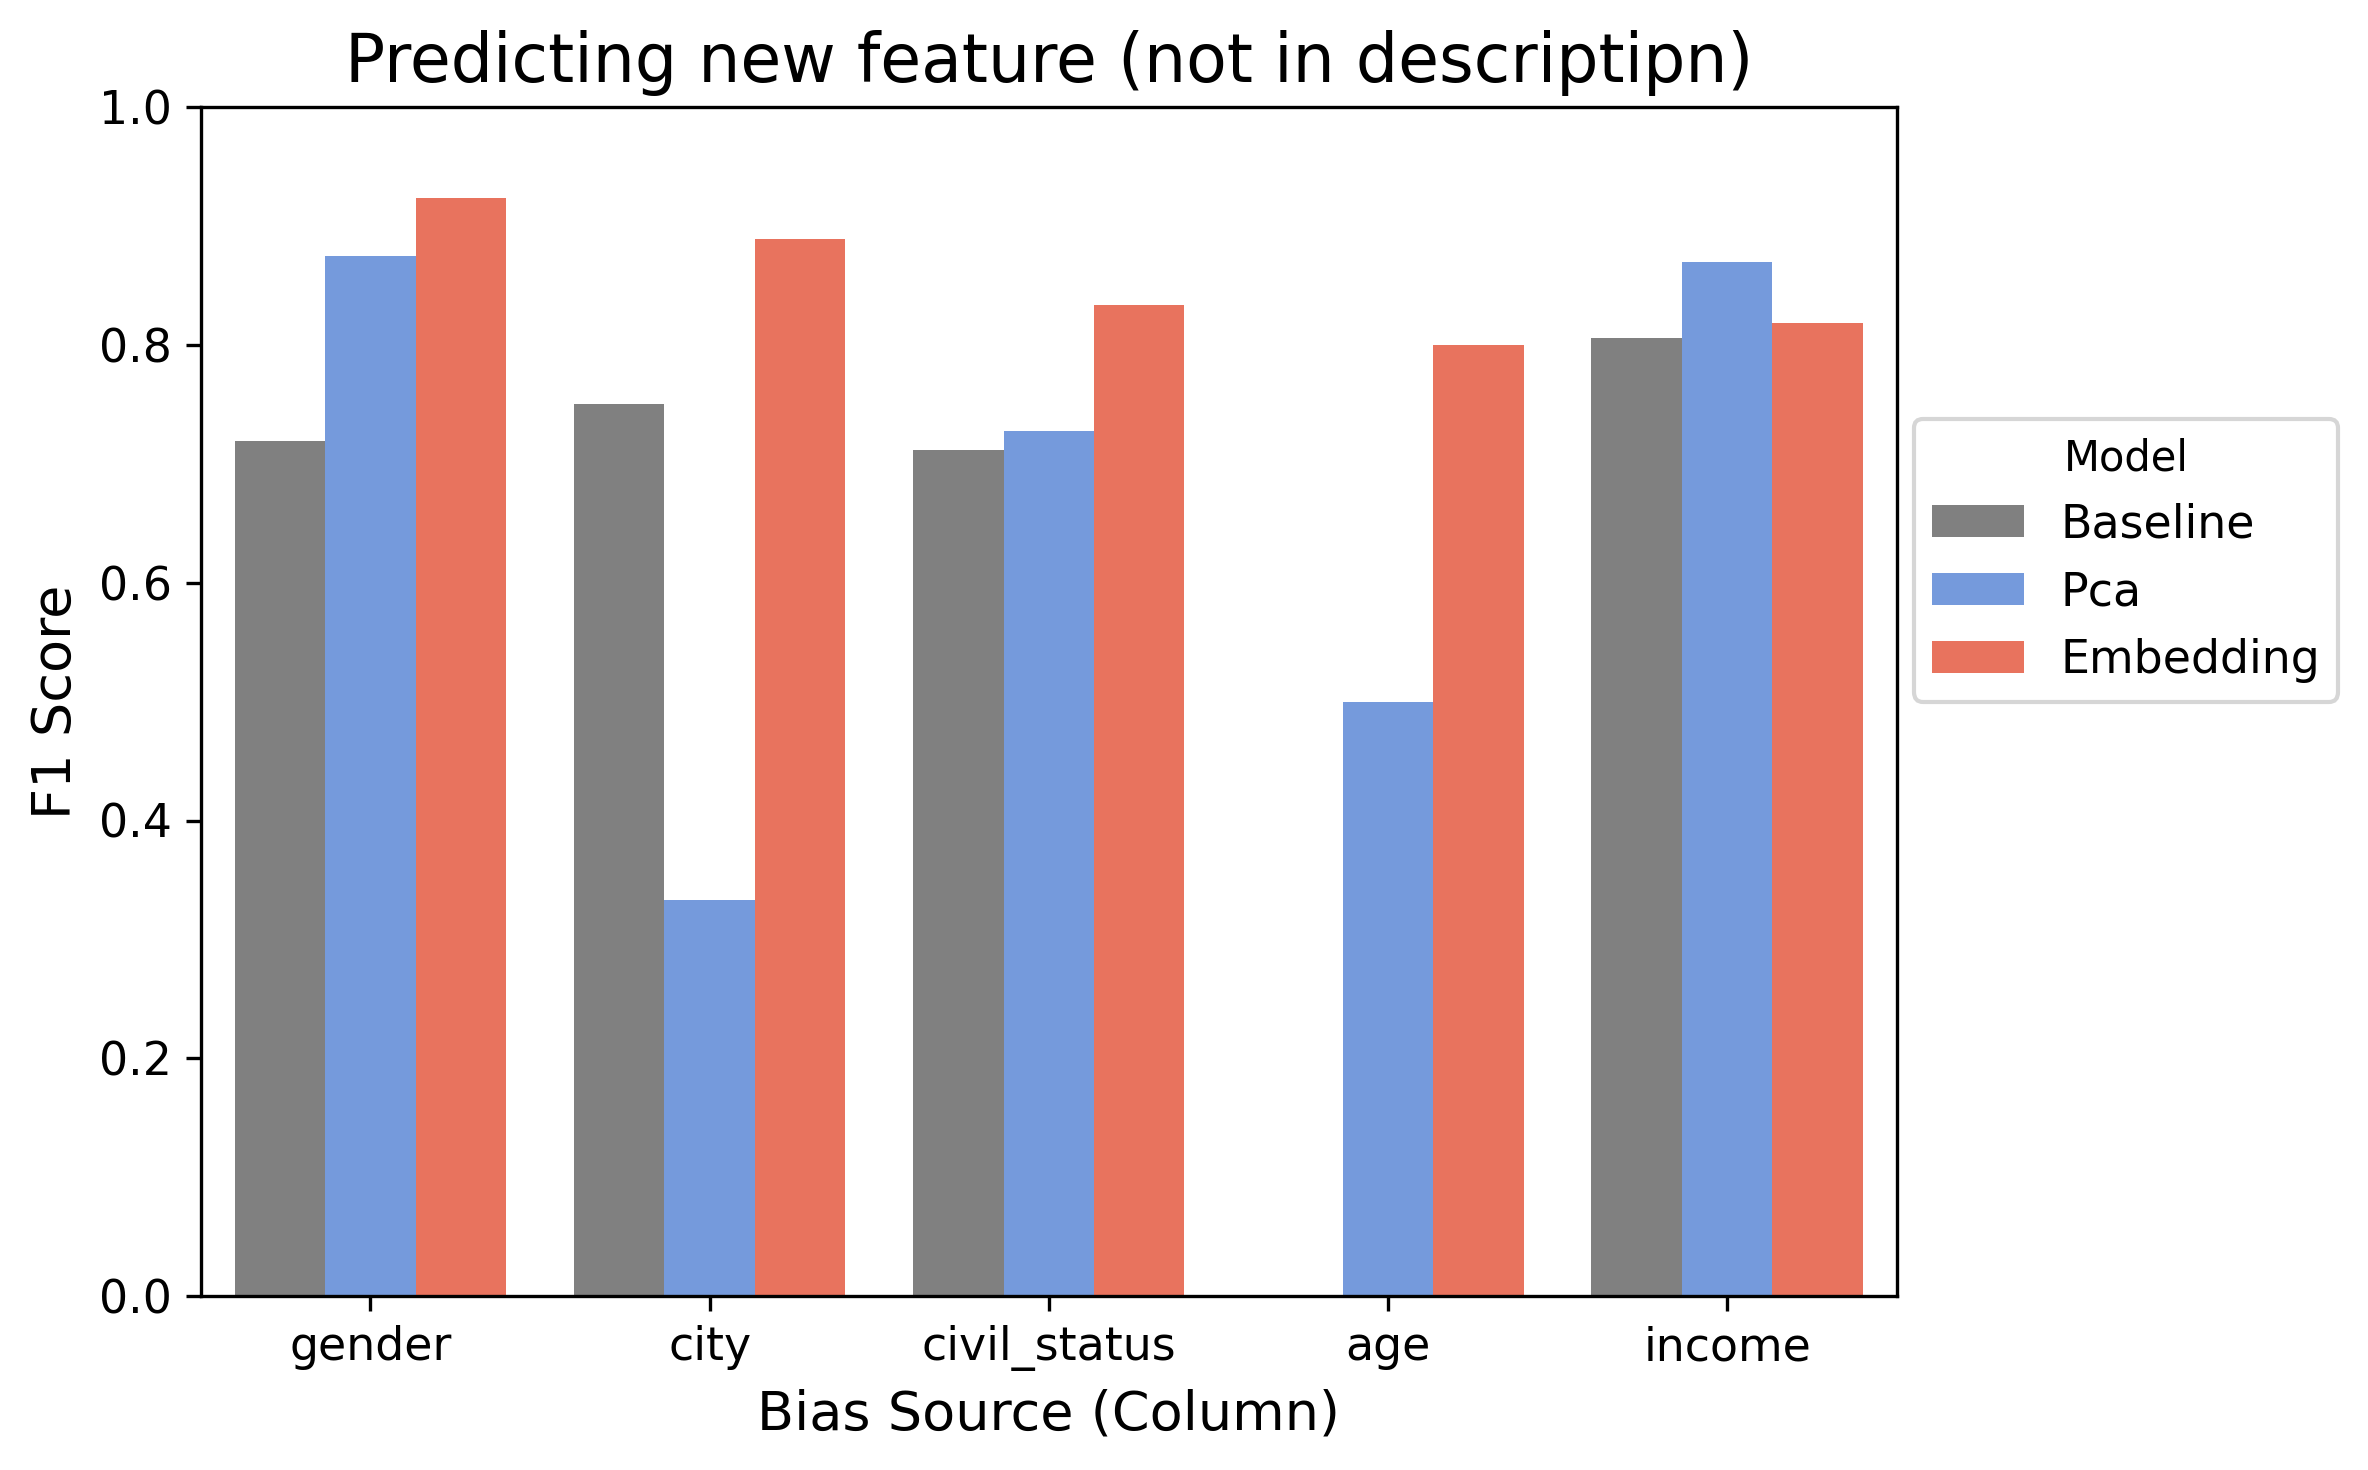

In [16]:
f1_long = pd.melt(
    results_df,
    id_vars=["bias_column", "bias_value"],
    value_vars=["baseline_f1", "pca_f1", "embedding_f1"],
    var_name="model",
    value_name="f1_score"
)

# clean up model labels
f1_long["model"] = f1_long["model"].str.replace("_f1", "").str.capitalize()

custom_palette = {
    "Baseline": "gray",
    "Pca": "cornflowerblue",
    "Embedding": "tomato"
}

plt.figure(figsize=(8, 5), dpi=300)
sns.barplot(data=f1_long, x="bias_column", y="f1_score", hue="model", palette=custom_palette)

plt.title("Predicting new feature (not in descriptipn)", fontsize=16)
plt.xlabel("Bias Source (Column)", fontsize=13)
plt.ylabel("F1 Score", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Model", fontsize=11, loc=(1.01,0.5))
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

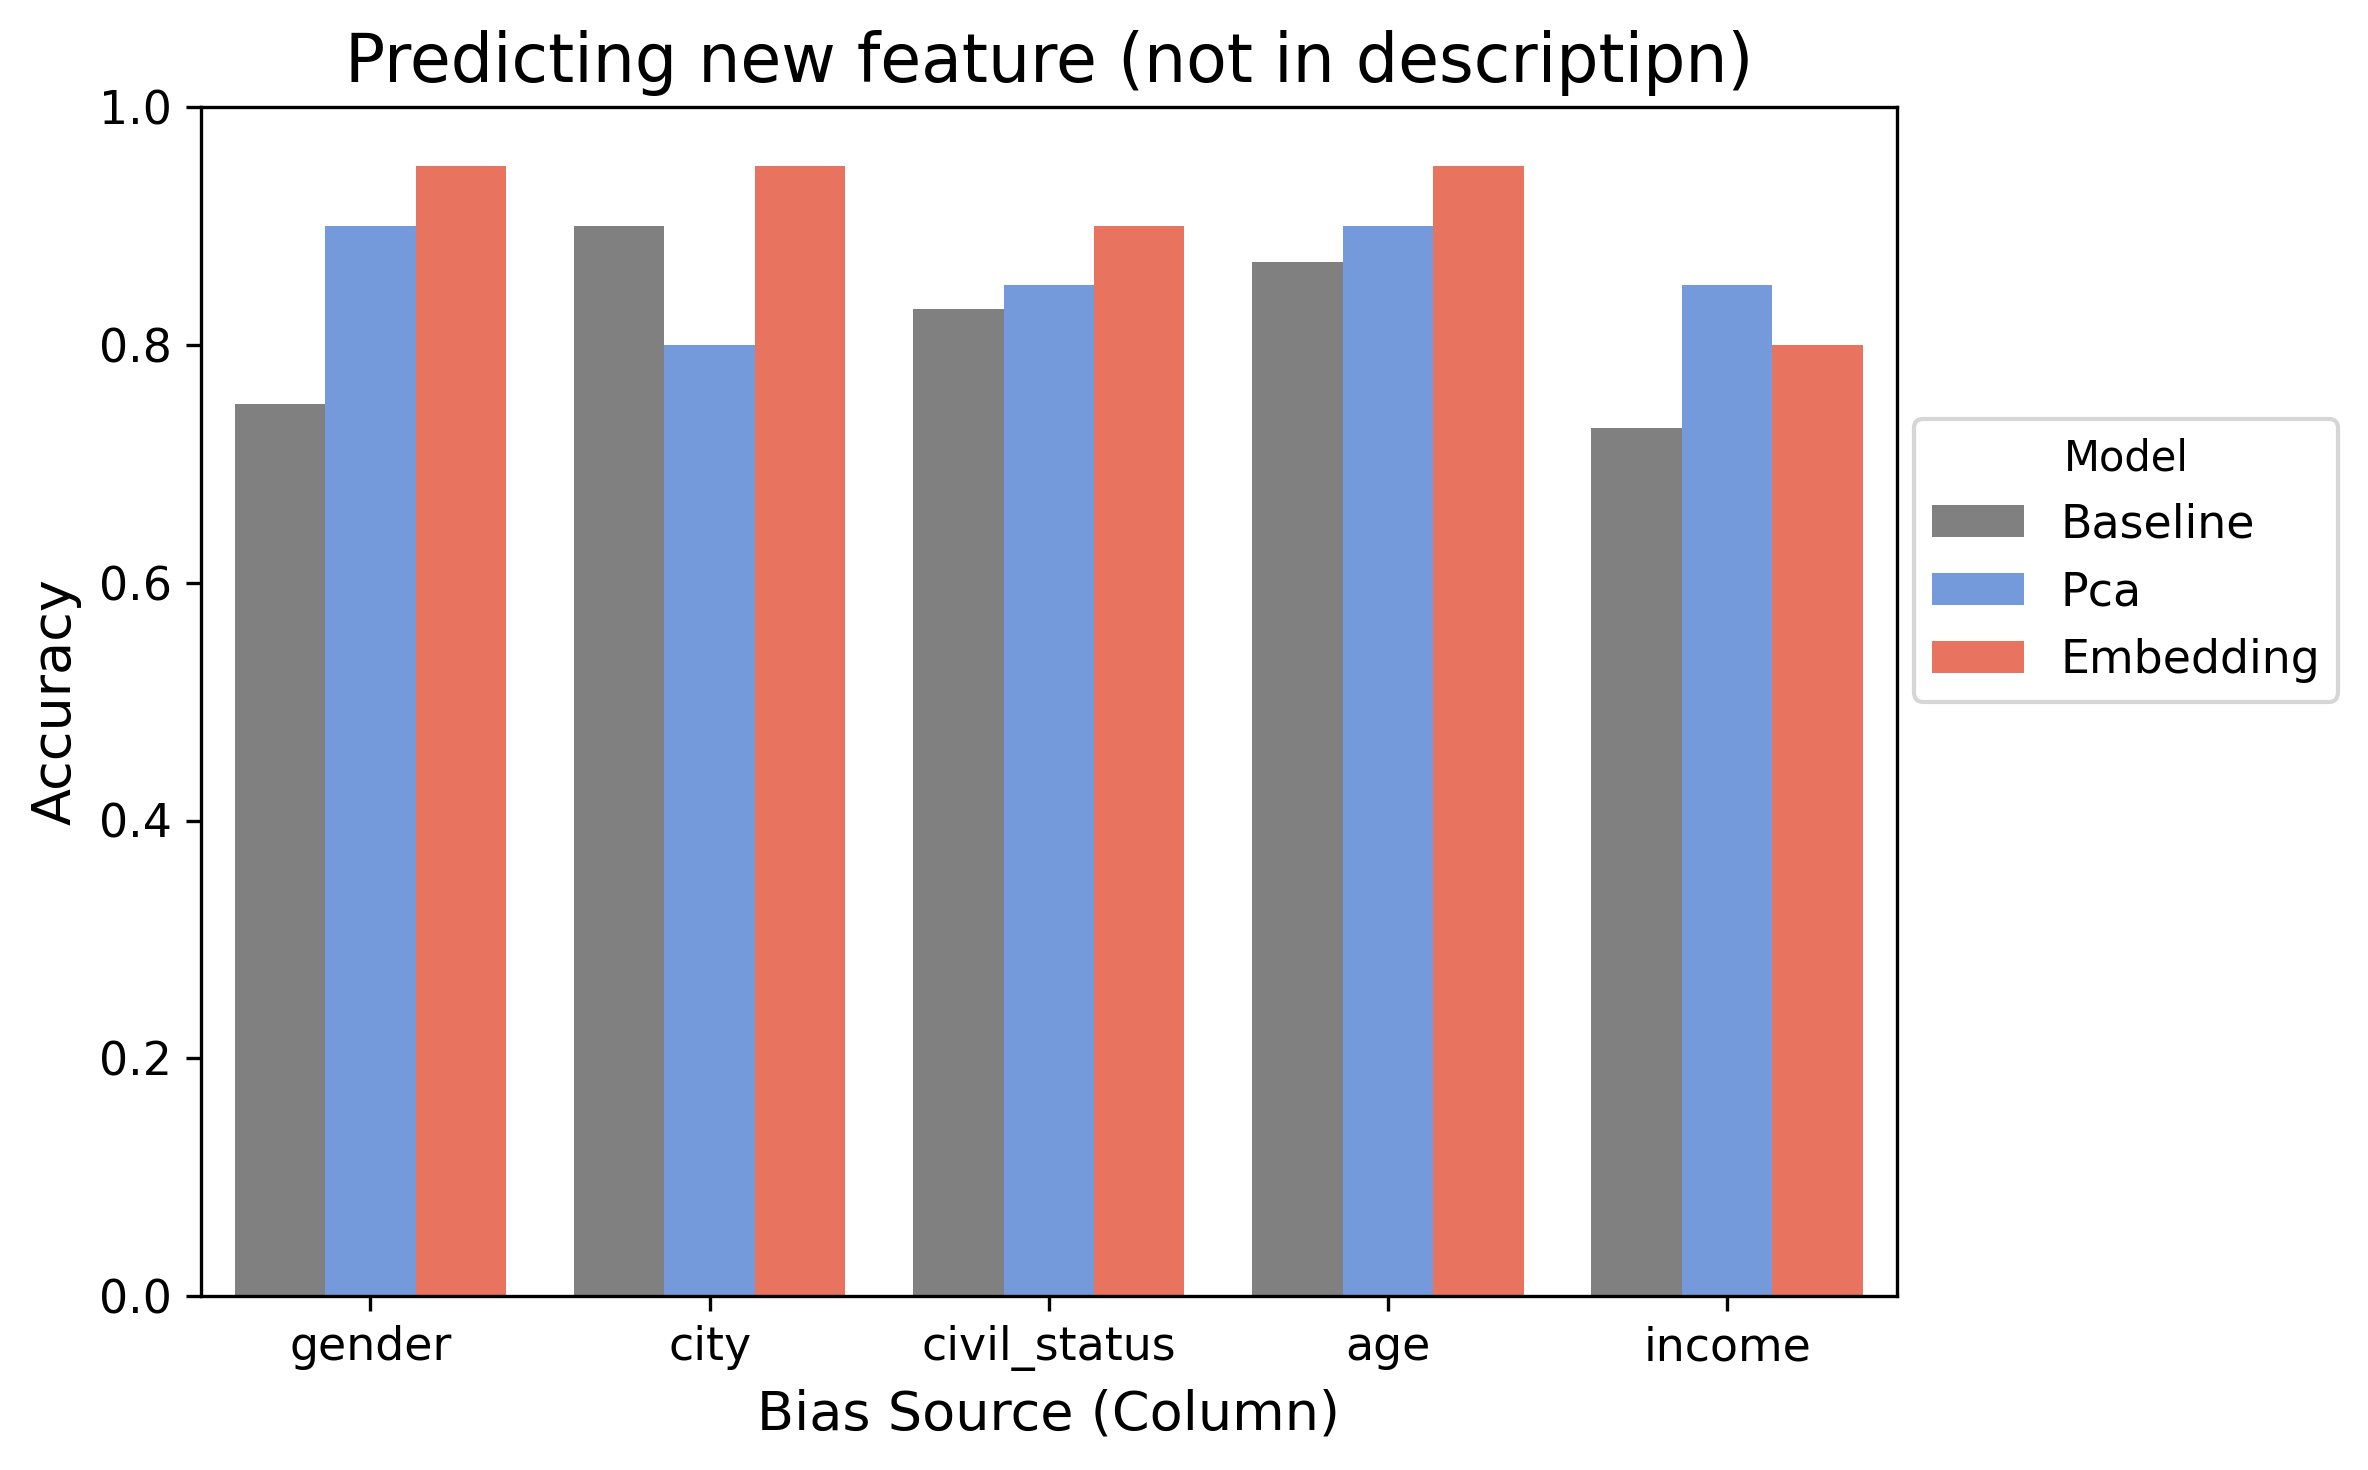

In [17]:
# Convert accuracy columns to long format
acc_long = pd.melt(
    results_df,
    id_vars=["bias_column", "bias_value"],
    value_vars=["baseline_accuracy", "pca_accuracy", "embedding_accuracy"],
    var_name="model",
    value_name="accuracy"
)

# Clean up model labels
acc_long["model"] = acc_long["model"].str.replace("_accuracy", "").str.capitalize()

# Set custom colors
custom_palette = {
    "Baseline": "gray",
    "Pca": "cornflowerblue",
    "Embedding": "tomato"
}

# Plot
plt.figure(figsize=(8, 5), dpi=300)
sns.barplot(data=acc_long, x="bias_column", y="accuracy", hue="model", palette=custom_palette)

plt.title("Predicting new feature (not in descriptipn)", fontsize=16)
plt.xlabel("Bias Source (Column)", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Model", fontsize=11, loc=(1.01, 0.5))
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
